In [70]:
from fipy import Grid2D, CellVariable, TransientTerm, DiffusionTerm, ConvectionTerm, Viewer
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [181]:
# Parâmetros do problema
nx = ny = 100  # Número de células na malha
dl = 1.0  # Tamanho da célula
duration = 10.0  # Tempo total de simulação
dt = 0.1  # Passo de tempo
beta = 0.1  # Taxa de decaimento de v
kappa = 0.95
epsilon = 0.03

In [182]:
# Definição da malha
mesh = Grid2D(dx=dl, dy=dl, nx=nx, ny=ny)

In [183]:
# Definição das variáveis
u = CellVariable(name="u", mesh=mesh, value=0.0)
v = CellVariable(name="v", mesh=mesh, value=5.0)

In [184]:
# Definir valor inicial diferente no centro do domínio
x, y = mesh.cellCenters  
xc, yc = nx * dl / 2, ny * dl / 2  # Centro do domínio
radius = 1  # Raio da região central

In [185]:
# Máscara para definir valores iniciais no centro
mask = (x - xc)**2 + (y - yc)**2 < radius**2
u.setValue(2.0, where=mask)  # Define u = 2.0 no centro

In [186]:
# Definição das funções f(u, v, x, y, t) e K(u)
def f(u, v, x, y, t):
    global beta
    return -beta * v  # Exemplo de função

In [187]:
def K(u):
    return kappa * (1 + epsilon * u)**3 + 1  # Difusividade dependente de u

In [188]:
# Definição do campo de convecção w (exemplo)
w = (-1.0, 0.5)  # Velocidades constantes em x e y

In [189]:
# Expressões dos termos da equação
F_u = f(u, v, x, y, 0)  # f em t = 0

In [190]:
eq_u = TransientTerm() == F_u + DiffusionTerm(coeff=K(u)) - ConvectionTerm(coeff=w)
eq_v = TransientTerm() == -beta * v

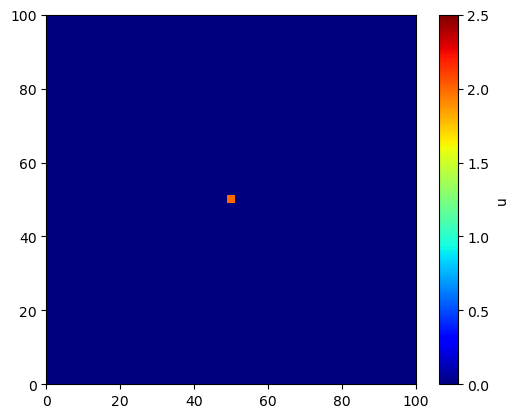

In [191]:
# Configuração do visualizador
#viewer = Viewer(vars=(u, v), datamin=0.0, datamax=2.5)
viewer = Viewer(vars=u, datamin=0.0, datamax=2.5)

In [ ]:
#  Loop de solução
time = 0.0
i = 0
while time < duration:
    eq_u.solve(var=u, dt=dt)
    eq_v.solve(var=v, dt=dt)
    u.setValue(np.maximum(u.value, 0.0))  # Garante u >= 0
    time += dt
    
    # Atualizar o viewer
    #viewer.plot()

    # Salvar imagem da variável u
    img = np.reshape(u.value, (100, 100))

    plt.imshow(img)
    plt.colorbar()
    plt.savefig(f'results/u_{i}')
    plt.show()
    
    